___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Time Series with Pandas Project Exercise

For this exercise, answer the questions below given the dataset: https://fred.stlouisfed.org/series/UMTMVS

This dataset is the Value of Manufacturers' Shipments for All Manufacturing Industries.

**Import any necessary libraries.**

In [2]:
# CODE HERE
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt

**Read in the data UMTMVS.csv file from the Data folder**

In [3]:
# CODE HERE
df = pd.read_csv('UMTMVS.csv',index_col='DATE',parse_dates=True)
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


**Set the DATE column as the index.**

In [48]:
# CODE HERE
#df.index= pd.to_datetime(df.index)

In [4]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

**Plot out the data, choose a reasonable figure size**

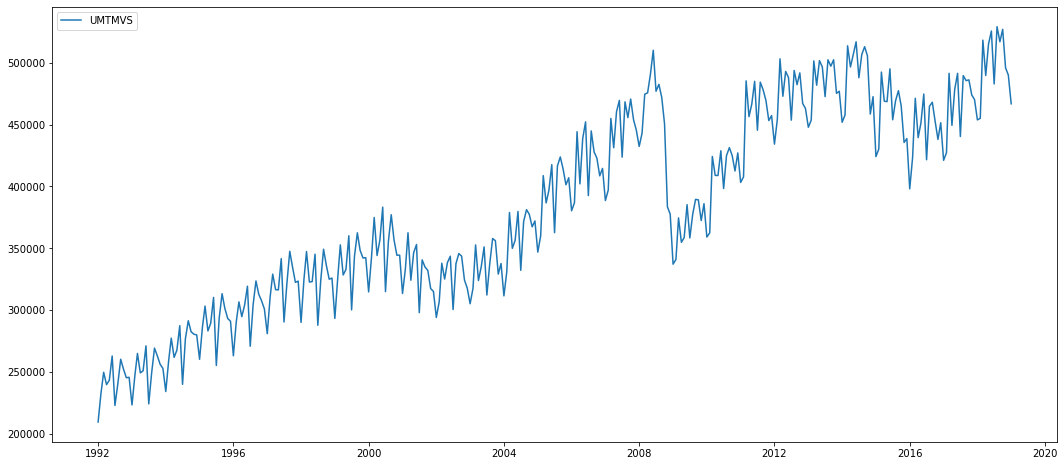

In [5]:
# CODE HERE

plt.figure(figsize=(18,8))
plt.plot(df,label='UMTMVS');
plt.legend();

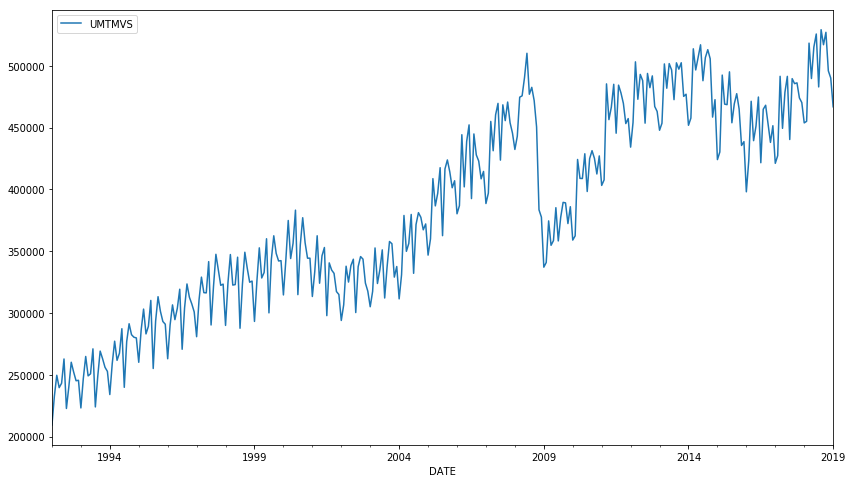

In [69]:
#Solution

**What was the percent increase in value from Jan 2009 to Jan 2019?**

In [6]:
#CODE HERE

df1=df.loc['2019-01-01']-df.loc['2009-01-01'] #grab locations from Jan 2009 to Jan 2019

percent_inc = df1/df.loc['2009-01-01']*100
percent_inc

UMTMVS    38.472149
dtype: float64

In [76]:
#Solution

UMTMVS    38.472149
dtype: float64

**What was the percent decrease from Jan 2008 to Jan 2009?**

In [7]:
#CODE HERE
df2=df.loc['2009-01-01']-df.loc['2008-01-01'] #grab locations from Jan 2009 to Jan 2019

percent_dec = df2/df.loc['2008-01-01']*100
percent_dec

UMTMVS   -22.022775
dtype: float64

In [77]:
#Solution

UMTMVS   -22.022775
dtype: float64

**What is the month with the least value after 2005?** [HINT](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

In [8]:
#CODE HERE
df3 = df.loc['2005-01-01':]
df3.idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

In [61]:
#Solution

UMTMVS   2009-01-01
dtype: datetime64[ns]

**What 6 months have the highest value?**

In [68]:
# CODE HERE

In [9]:
df.sort_values(by='UMTMVS',ascending=False).head()

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0


**How many millions of dollars in value was lost in 2008? (Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)**

In [10]:
# CODE HERE
df4 = df.loc['2008-01-01'] - df.loc['2009-01-01']
df4

UMTMVS    95206.0
dtype: float64

In [18]:
#Solution

UMTMVS    95206.0
dtype: float64

**Create a bar plot showing the average value in millions of dollars per year**

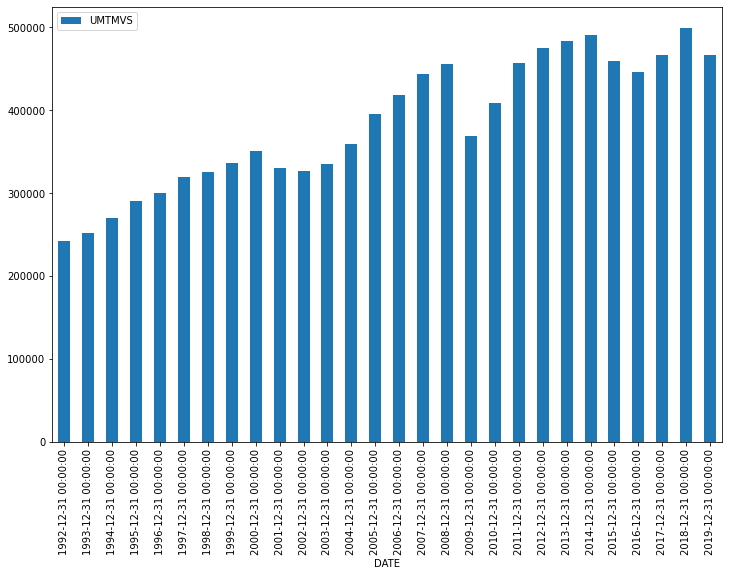

In [11]:
# CODE HERE
df5 = df.resample('Y').mean().plot.bar(figsize=(12,8))

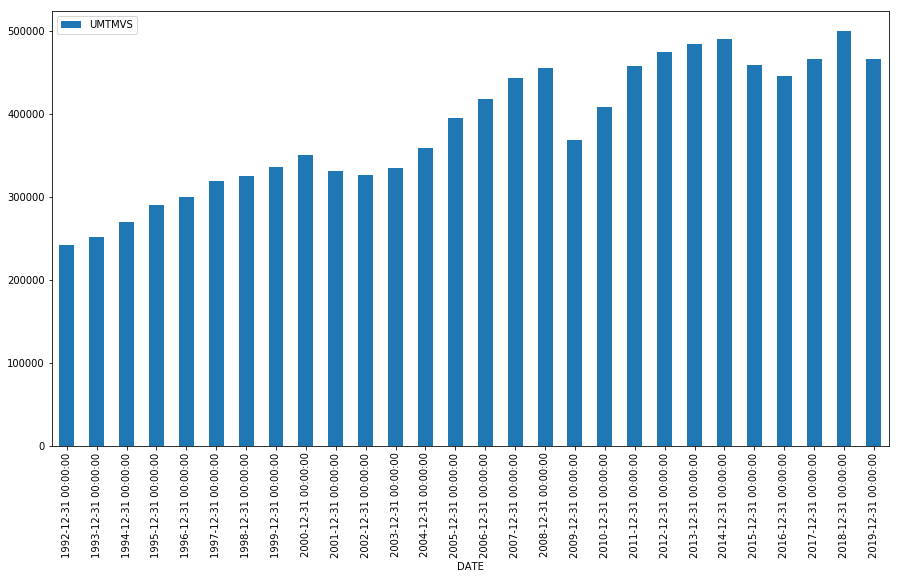

In [20]:
#Solution

**What year had the biggest increase in mean value from the previous year's mean value? (Lots of ways to get this answer!)**

[HINT for a useful method](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.idxmax.html)

In [12]:
# CODE HERE
yearly_data = df.resample('Y').mean()
yearly_data.head()

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


In [13]:
yearly_data_shift=yearly_data.shift(1)
yearly_data_shift.head()

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,242002.000000
1994-12-31,251708.083333
1995-12-31,269842.666667
1996-12-31,289973.083333


In [14]:
change = yearly_data-yearly_data_shift
change.head()

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,9706.083333
1994-12-31,18134.583333
1995-12-31,20130.416667
1996-12-31,9792.583333


In [15]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

In [25]:
#Solution

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

**Plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!**

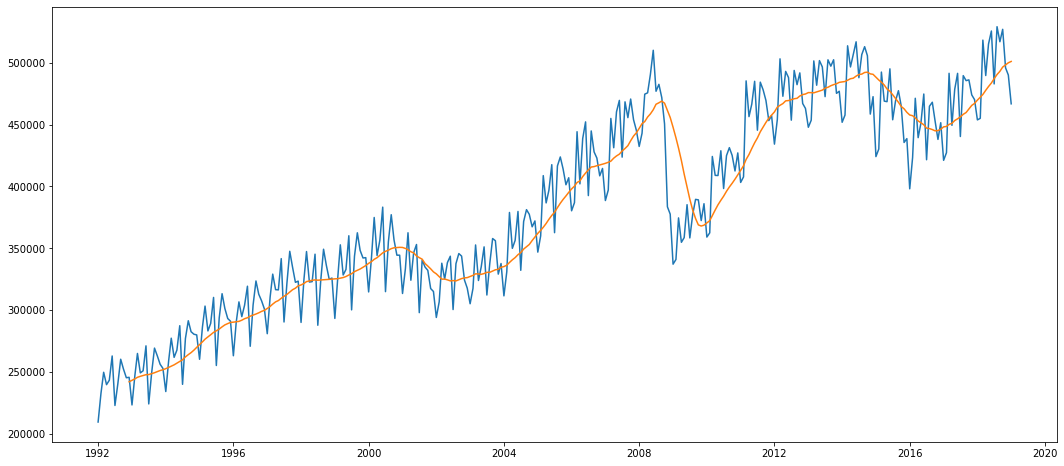

In [16]:
# CODE HERE
df['Yearly Mean']=df['UMTMVS'].rolling(window=12).mean()

plt.figure(figsize=(18,8))
plt.plot(df);

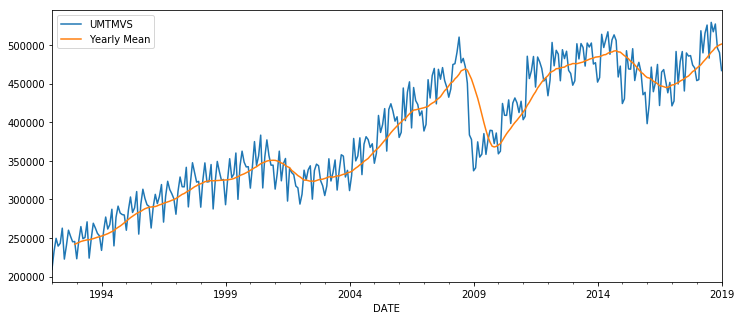

In [78]:
#Solution

**BONUS QUESTION (HARD).**

**Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak? (Since it crashed immediately after this peak) There are many ways to get this answer. NOTE: I get 70 months as my answer, you may get 69 or 68, depending on whether or not you count the start and end months. Refer to the video solutions for full explanation on this.**

In [17]:
df = pd.read_csv('UMTMVS.csv',index_col='DATE',parse_dates=True)
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [18]:
#CODE HERE
df2008=df.loc['2008-01-01':'2008-12-01']
df2008

,UMTMVS
DATE,
2008-01-01,432307.0
2008-02-01,442996.0
2008-03-01,474592.0
2008-04-01,475667.0
2008-05-01,490500.0
2008-06-01,510081.0
2008-07-01,476948.0
2008-08-01,482530.0
2008-09-01,471799.0


In [19]:
df2008.idxmax()

UMTMVS   2008-06-01
dtype: datetime64[ns]

In [20]:
df2008.max()

UMTMVS    510081.0
dtype: float64

In [21]:
#post peak
df_post_peak = df.loc['2008-06-01':]
df_post_peak[df_post_peak>=510081.0].dropna()

,UMTMVS
DATE,
2008-06-01,510081.0
2014-03-01,513700.0
2014-06-01,516935.0
2014-09-01,512988.0
2018-03-01,518285.0
2018-05-01,515105.0
2018-06-01,525660.0
2018-08-01,529157.0
2018-09-01,516992.0


In [22]:
len(df.loc['2008-06-01':'2014-03-01'])

70

# GREAT JOB!